<a href="https://colab.research.google.com/github/Ankur099IIT/Natural-Language-Processing-Course-3-Deeplearning.ai/blob/main/Generating_text_from_Bollywood_rap_songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget  https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt

--2022-05-10 09:49:45--  https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘irish-lyrics-eof.txt’

irish-lyrics-eof.tx 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2022-05-10 09:49:46 (98.3 MB/s) - ‘irish-lyrics-eof.txt’ saved [68970/68970]



In [54]:
# load the data

data = open('/content/Dil Toota Lekar Muskurate.txt').read()
data

"Ab apne man ko kar shant or mere bol ko sun\nEk ek bar he gyan, samaj or amal kar vo gun\nBeat ko chalne de, bass ko badhne de\nKho ja is geet pe, sama ye apne ander dhun\nDar ko hata, jigar phad, dahar apne seene se\nZindagi koi khel nahi, samaj duniya dimag se\nLog ayenge bahut rokne wale, jalne wale\nPer mat rukh, baazigar vahi jo ubhare in logo se\nKar sachi mehnat, dikhava nahi, kar akal ka istemal\nAaj ya kal, ager tu he real, kamyab hogi har chal\nBas sun apne man ki, kar vahi jo he dimag me\nKarna he toofani? kar, agey badh, ho kesa bhi haal\nBas! baat vahi, mat le bhag jahan he race me bheed\nKar kuch apna taki is race me lage logo ki bheed\nEk zindagi, ek mukaam, dalde apni jaan isme\nUthayega khatra, hoga ehsaas, tabhi banega sacha veer\nMe aa gaya hu pure josh me\nKarunga vahi jo he apni soch me\nDin raat ek karke karunga mehnat\nDar ko dafnake launga himmat jaan me\nMujhe pata he logo ko pasand nahi\nKi agey jaye unse bina puche koi bhi\nLog nachana chahthe he apne ishare

In [55]:
corpus = data.lower()
corpus

"ab apne man ko kar shant or mere bol ko sun\nek ek bar he gyan, samaj or amal kar vo gun\nbeat ko chalne de, bass ko badhne de\nkho ja is geet pe, sama ye apne ander dhun\ndar ko hata, jigar phad, dahar apne seene se\nzindagi koi khel nahi, samaj duniya dimag se\nlog ayenge bahut rokne wale, jalne wale\nper mat rukh, baazigar vahi jo ubhare in logo se\nkar sachi mehnat, dikhava nahi, kar akal ka istemal\naaj ya kal, ager tu he real, kamyab hogi har chal\nbas sun apne man ki, kar vahi jo he dimag me\nkarna he toofani? kar, agey badh, ho kesa bhi haal\nbas! baat vahi, mat le bhag jahan he race me bheed\nkar kuch apna taki is race me lage logo ki bheed\nek zindagi, ek mukaam, dalde apni jaan isme\nuthayega khatra, hoga ehsaas, tabhi banega sacha veer\nme aa gaya hu pure josh me\nkarunga vahi jo he apni soch me\ndin raat ek karke karunga mehnat\ndar ko dafnake launga himmat jaan me\nmujhe pata he logo ko pasand nahi\nki agey jaye unse bina puche koi bhi\nlog nachana chahthe he apne ishare

In [56]:
corpus = corpus.split('\n')
print(corpus)

['ab apne man ko kar shant or mere bol ko sun', 'ek ek bar he gyan, samaj or amal kar vo gun', 'beat ko chalne de, bass ko badhne de', 'kho ja is geet pe, sama ye apne ander dhun', 'dar ko hata, jigar phad, dahar apne seene se', 'zindagi koi khel nahi, samaj duniya dimag se', 'log ayenge bahut rokne wale, jalne wale', 'per mat rukh, baazigar vahi jo ubhare in logo se', 'kar sachi mehnat, dikhava nahi, kar akal ka istemal', 'aaj ya kal, ager tu he real, kamyab hogi har chal', 'bas sun apne man ki, kar vahi jo he dimag me', 'karna he toofani? kar, agey badh, ho kesa bhi haal', 'bas! baat vahi, mat le bhag jahan he race me bheed', 'kar kuch apna taki is race me lage logo ki bheed', 'ek zindagi, ek mukaam, dalde apni jaan isme', 'uthayega khatra, hoga ehsaas, tabhi banega sacha veer', 'me aa gaya hu pure josh me', 'karunga vahi jo he apni soch me', 'din raat ek karke karunga mehnat', 'dar ko dafnake launga himmat jaan me', 'mujhe pata he logo ko pasand nahi', 'ki agey jaye unse bina puche 

In [57]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer  = Tokenizer()

tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

print(total_words)

879


In [58]:
print(corpus)

['ab apne man ko kar shant or mere bol ko sun', 'ek ek bar he gyan, samaj or amal kar vo gun', 'beat ko chalne de, bass ko badhne de', 'kho ja is geet pe, sama ye apne ander dhun', 'dar ko hata, jigar phad, dahar apne seene se', 'zindagi koi khel nahi, samaj duniya dimag se', 'log ayenge bahut rokne wale, jalne wale', 'per mat rukh, baazigar vahi jo ubhare in logo se', 'kar sachi mehnat, dikhava nahi, kar akal ka istemal', 'aaj ya kal, ager tu he real, kamyab hogi har chal', 'bas sun apne man ki, kar vahi jo he dimag me', 'karna he toofani? kar, agey badh, ho kesa bhi haal', 'bas! baat vahi, mat le bhag jahan he race me bheed', 'kar kuch apna taki is race me lage logo ki bheed', 'ek zindagi, ek mukaam, dalde apni jaan isme', 'uthayega khatra, hoga ehsaas, tabhi banega sacha veer', 'me aa gaya hu pure josh me', 'karunga vahi jo he apni soch me', 'din raat ek karke karunga mehnat', 'dar ko dafnake launga himmat jaan me', 'mujhe pata he logo ko pasand nahi', 'ki agey jaye unse bina puche 

In [59]:
print(tokenizer.word_index)

{'se': 1, 'है': 2, 'hai': 3, 'hoon': 4, 'bhi': 5, 'ko': 6, 'tu': 7, 'mein': 8, 'he': 9, 'me': 10, 'ke': 11, 'ab': 12, 'pe': 13, 'nahi': 14, 'jo': 15, 'mere': 16, 'में': 17, 'meri': 18, 'मान': 19, 'लिया': 20, 'जब': 21, 'chal': 22, 'ka': 23, 'na': 24, 'tujhe': 25, 'apne': 26, 'de': 27, 'ye': 28, 'kar': 29, 'ek': 30, 'rap': 31, 'dost': 32, 'woh': 33, 'ho': 34, 'गांधी': 35, 'koi': 36, 'ki': 37, 'aur': 38, 'मन': 39, 'को': 40, 'लगती': 41, 'शांति': 42, 'chahta': 43, 'wale': 44, 'har': 45, 'kuch': 46, 'main': 47, 'kya': 48, 'haath': 49, 'wo': 50, 'तेरे': 51, 'नहीं': 52, 'मेरे': 53, 'zindagi': 54, 'aa': 55, 'hu': 56, 'dekh': 57, 'saath': 58, 'mera': 59, 'bombay': 60, 'maa': 61, 'milata': 62, 'ghar': 63, 'khilata': 64, 'bola': 65, 'haq': 66, 'nibhata': 67, 'dar': 68, 'mat': 69, 'vahi': 70, 'karunga': 71, 'karne': 72, 'liye': 73, 'raha': 74, 'sab': 75, 'kahin': 76, 'hain': 77, 'jab': 78, 'naka': 79, 'haan': 80, 'सही': 81, 'साथ': 82, 'भाई': 83, 'log': 84, 'bahut': 85, 'logo': 86, 'mehnat': 87, 'ba

In [60]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]

  for i in range(1, len(token_list)):
    input_sequences.append(token_list[:i+1])

max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = pad_sequences(input_sequences, maxlen= max_sequence_len, padding = 'pre')

print(input_sequences)


[[  0   0   0 ...   0  12  26]
 [  0   0   0 ...  12  26 155]
 [  0   0   0 ...  26 155   6]
 ...
 [  0   0   0 ...  50  66   1]
 [  0   0   0 ...  66   1  67]
 [  0   0   0 ...   1  67   4]]


In [61]:
input_sequences.shape

(1660, 12)

In [62]:
xs = input_sequences[:, :-1]
labels = input_sequences[:,-1]

In [63]:
xs.shape, labels.shape

((1660, 11), (1660,))

In [64]:
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [65]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_len - 1),   # max_sequence_len - 1 (number of columns in xs/training_data shape)                  
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
        tf.keras.layers.Dense(total_words, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [66]:
history =  model.fit(xs, ys, epochs = 100)

Epoch 1/100
52/52 [==============================] - 3s 9ms/step - loss: 6.6125 - accuracy: 0.0193
Epoch 2/100
52/52 [==============================] - 0s 9ms/step - loss: 6.1257 - accuracy: 0.0235
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 5.9074 - accuracy: 0.0289
Epoch 4/100
52/52 [==============================] - 0s 9ms/step - loss: 5.6925 - accuracy: 0.0398
Epoch 5/100
52/52 [==============================] - 0s 8ms/step - loss: 5.4530 - accuracy: 0.0512
Epoch 6/100
52/52 [==============================] - 0s 8ms/step - loss: 5.2105 - accuracy: 0.0681
Epoch 7/100
52/52 [==============================] - 0s 8ms/step - loss: 4.9427 - accuracy: 0.0880
Epoch 8/100
52/52 [==============================] - 0s 8ms/step - loss: 4.7162 - accuracy: 0.1169
Epoch 9/100
52/52 [==============================] - 0s 8ms/step - loss: 4.4584 - accuracy: 0.1404
Epoch 10/100
52/52 [==============================] - 0s 9ms/step - loss: 4.2266 - accuracy: 0.1765
Epoch 11/

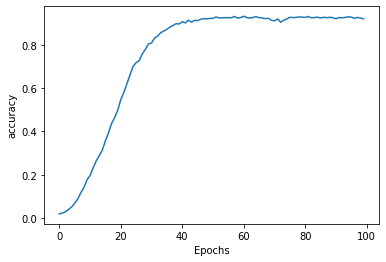

In [67]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [69]:
import numpy as np


# Define seed text
seed_text = "me nikla tha akela lekin mil gya mela"

# Define total words to predict
next_words = 50

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])
	
  # Sort the probabilities in ascending order 
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:
		
		# Look up the word associated with the index. 
	  output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
	  seed_text += " " + output_word

# Print the result	
print(seed_text)

me nikla tha akela lekin mil gya mela apne seene se logo liye meri aai खूनी veer veer kar gita bade din bas khass jaaye ladka chun gayi aage bhi samjhegi ko jo jaaye college he dekh maa se nibhata है gayi samjhegi me chun मेरे karne gayi taiyyar gayi aage masle gayi मेरे ही है sabdho rap
